In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Social Demographic Group

In [2]:
# Import the dataset
Social_dataset_path= "../../Data/Clean_Data/Social_group.csv"
target_path = "../../Data/Clean_Data/target_column.csv"

Social = pd.read_csv(Social_dataset_path, sep=",", index_col=False)
target = pd.read_csv(target_path, index_col = False)
display (Social.head())
target.head()


,Living Situation,Household Composition,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Criminal Justice Status,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits
0,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
1,PRIVATE RESIDENCE,LIVES ALONE,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
2,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,15-34 HOURS,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO
3,OTHER LIVING SITUATION,NOT APPLICABLE,EMPLOYED,15-34 HOURS,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,NO,YES,NO,NO,NO,NO,NO
4,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,35 HOURS OR MORE,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,YES,NO


,Unnamed: 0,Mental Illness
0,0,YES
1,1,YES
2,2,YES
3,3,YES
4,4,YES


In [3]:
# new social group dataset (I add the target)
new_soc_grp = Social.copy()
new_soc_grp["Mental Illness"] = target["Mental Illness"].values
new_soc_grp.head()

,Living Situation,Household Composition,Employment Status,Number Of Hours Worked Each Week,Education Status,Special Education Services,Criminal Justice Status,SSI Cash Assistance,SSDI Cash Assistance,Veterans Disability Benefits,Veterans Cash Assistance,Public Assistance Cash Program,Other Cash Benefits,Mental Illness
0,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
1,PRIVATE RESIDENCE,LIVES ALONE,EMPLOYED,01-14 HOURS,COLLEGE OR GRADUATE DEGREE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
2,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,15-34 HOURS,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,NO,NO,YES
3,OTHER LIVING SITUATION,NOT APPLICABLE,EMPLOYED,15-34 HOURS,MIDDLE SCHOOL TO HIGH SCHOOL,NOT APPLICABLE,NO,YES,NO,NO,NO,NO,NO,YES
4,PRIVATE RESIDENCE,COHABITATES WITH OTHERS,EMPLOYED,35 HOURS OR MORE,SOME COLLEGE,NOT APPLICABLE,NO,NO,NO,NO,NO,YES,NO,YES


In [4]:
# frequency_table  function
def frequency_table(data: pd.DataFrame, target_col: str, feature_cols):
    freq_tab = pd.crosstab(index = data[target_col], columns = data[feature_cols], margins = True)
    rel_table = round(freq_tab/freq_tab.loc["All"], 2)
    return freq_tab, rel_table

In [5]:
#analysis Program Category column

for col in new_soc_grp.columns[0:-1]:
    freq, rel = frequency_table(new_soc_grp, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()

Two-way frequency table
Living Situation  INSTITUTIONAL SETTING  OTHER LIVING SITUATION  \
Mental Illness                                                    
NO                                   12                     754   
YES                                1361                   31068   
All                                1373                   31822   

Living Situation  PRIVATE RESIDENCE  UNKNOWN     All  
Mental Illness                                        
NO                             4597      214    5577  
YES                          148238     7873  188540  
All                          152835     8087  194117  
------------------------------------------------------------------------------------------


Two-way frequency table
Household Composition  COHABITATES WITH OTHERS  LIVES ALONE  NOT APPLICABLE  \
Mental Illness                                                                
NO                                        3979          684             795   
YES        

In [6]:
# Functions defintion

# Living Situation
def aggregate_living_situation(df):
    "This function aggregates the initial 4 categories into 2"
    return df['Living Situation'].replace({
                                            'PRIVATE RESIDENCE': 'PRIVATE RESIDENCE',
                                            'OTHER LIVING SITUATION': 'OTHER',
                                            'INSTITUTIONAL SETTING': 'INSTITUTIONAL/UNKNOWN',
                                            'UNKNOWN': 'INSTITUTIONAL/UNKNOWN'
                                        })

# Houshold Composition
def aggregate_household_composition(df):
    "This function aggregates the initial 4 categories into 2"
    return df['Household Composition'].replace({
                                            'COHABITATES WITH OTHERS': 'COHABITANTS',
                                            'LIVES ALONE': 'LIVES ALONE',
                                            'NOT APPLICABLE': 'NOT APPLICABLE/UNKOWN',
                                            'UNKNOWN': 'NOT APPLICABLE/UNKOWN'
                                        })

# Employment Status
def aggregate_employment_status(df):
    "This function aggregates the initial 5 categories into 4"
    return df['Employment Status'].replace({
                                        'EMPLOYED': 'EMPLOYED',
                                        'NON-PAID/VOLUNTEER': 'UNEMPLOYED/UNKNOW',
                                        'NOT IN LABOR FORCE:UNEMPLOYED AND NOT LOOKING FOR WORK': 'NOT IN LABOR FORCE',
                                        'UNEMPLOYED, LOOKING FOR WORK': 'UNEMPLOYED/UNKNOW',
                                        'UNKNOWN EMPLOYMENT STATUS': 'UNEMPLOYED/UNKNOW'
                                    })

# Number Of Hours Worked Each Week
def aggregate_weekly_working_hours(df):
    "This function aggregates the initial 5 categories into 4"
    return df['Number Of Hours Worked Each Week'].replace({
                                    '01-14 HOURS': 'LOW/UNKNOWN',
                                    '15-34 HOURS': 'AVERAGE OR MORE',
                                    '35 HOURS OR MORE': 'AVERAGE OR MORE',
                                    'NOT APPLICABLE': 'NOT APPLICABLE',
                                    'UNKNOWN EMPLOYMENT HOURS': 'LOW/UNKNOWN'
                                })

# Education Status
def aggregate_education_status(df):
    "This function aggregates the initial 7 categories into 4"
    return df['Education Status'].replace({
                                            'COLLEGE OR GRADUATE DEGREE': 'HIGHLY EDUCATED',
                                            'MIDDLE SCHOOL TO HIGH SCHOOL': 'MEDIUM EDUCATED',
                                            'NO FORMAL EDUCATION': 'OTHERS/UNKNOWN',
                                            'OTHER': 'OTHERS/UNKNOWN',
                                            'PRE-K TO FIFTH GRADE': 'LOW EDUCATED',
                                            'SOME COLLEGE': 'HIGHLY EDUCATED',
                                            'UNKNOWN': 'OTHERS/UNKNOWN'
                                        })

# Special Education Services
def aggregate_special_education_services(df):
    "This function improves the interpretability"
    return df['Special Education Services'].replace({
                                            'NO': 'NO',
                                            'NOT APPLICABLE': 'NOT APPLICABLE/UNKNOWN',
                                            'UNKNOWN': 'NOT APPLICABLE/UNKNOWN',
                                            'YES': 'YES'
                                        })

# Criminal Justice Status
def aggregate_criminal_justice_status(df):
    "This function aggregates the initial 3 categories into 2"
    return df['Criminal Justice Status'].replace({
                                'NO': 'NO',
                                'UNKNOWN': 'UNKNOWN',
                                'YES': 'YES'
                            })

# SSI Cash Assistance
def aggregate_SSI_cash_assistance(df):
    "This function aggregates the initial categories into 2"
    return df['SSI Cash Assistance'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })

# SSDI Cash Assistance
def aggregate_SSDI_cash_ssistance(df):
    "This function aggregates the initial categories into 2"
    return df['SSDI Cash Assistance'].replace({
                                                'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                            })

# Veterans Disability Benefits 
def aggregate_veterans_disability_benefits(df):

    return df['Veterans Disability Benefits'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })

# Veterans Cash Assistance 
def aggregate_veterans_cash_assistance(df):

    return df['Veterans Cash Assistance'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })

# Public Assistance Cash Program
def aggregate_public_assistance_cash_program(df):

    return df['Public Assistance Cash Program'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })

# Other Cash Benefits
def aggregate_other_cash_benefits(df):

    return df['Other Cash Benefits'].replace({
                                            'NO': 'NO',
                                            'UNKNOWN': 'UNKNOWN',
                                            'YES': 'YES'
                                        })


In [7]:
# Use all the aggregation funxtions into one
def apply_all_aggregations(df):
    df = df.copy()
    df['Living Situation'] = aggregate_living_situation(df)
    df['Household Composition'] = aggregate_household_composition(df)
    df['Employment Status'] = aggregate_employment_status(df)
    df['Number Of Hours Worked Each Week'] = aggregate_weekly_working_hours(df)
    df['Education Status'] = aggregate_education_status(df)
    df['Special Education Services'] = aggregate_special_education_services(df)
    df['Criminal Justice Status'] = aggregate_criminal_justice_status(df)
    df['SSI Cash Assistance'] = aggregate_SSI_cash_assistance(df)
    df['SSDI Cash Assistance'] = aggregate_SSDI_cash_ssistance(df)
    df['Veterans Disability Benefits'] = aggregate_veterans_disability_benefits(df)
    df['Veterans Cash Assistance'] = aggregate_veterans_cash_assistance(df)
    df['Public Assistance Cash Program'] = aggregate_public_assistance_cash_program(df)
    df['Other Cash Benefits'] = aggregate_other_cash_benefits(df)
    return df

In [8]:

# Apply to Social dataset
Social_cat_agg = apply_all_aggregations(new_soc_grp)

# check unique values after aggregation
for col in Social_cat_agg.columns:
    print(f"{col} → {Social_cat_agg[col].unique()}")

Living Situation → ['PRIVATE RESIDENCE' 'OTHER' 'INSTITUTIONAL/UNKNOWN']
Household Composition → ['COHABITANTS' 'LIVES ALONE' 'NOT APPLICABLE/UNKOWN']
Employment Status → ['EMPLOYED' 'NOT IN LABOR FORCE' 'UNEMPLOYED/UNKNOW']
Number Of Hours Worked Each Week → ['LOW/UNKNOWN' 'AVERAGE OR MORE' 'NOT APPLICABLE']
Education Status → ['HIGHLY EDUCATED' 'MEDIUM EDUCATED' 'OTHERS/UNKNOWN' 'LOW EDUCATED']
Special Education Services → ['NOT APPLICABLE/UNKNOWN' 'YES' 'NO']
Criminal Justice Status → ['NO' 'YES' 'UNKNOWN']
SSI Cash Assistance → ['NO' 'YES' 'UNKNOWN']
SSDI Cash Assistance → ['NO' 'YES' 'UNKNOWN']
Veterans Disability Benefits → ['NO' 'UNKNOWN' 'YES']
Veterans Cash Assistance → ['NO' 'UNKNOWN' 'YES']
Public Assistance Cash Program → ['NO' 'YES' 'UNKNOWN']
Other Cash Benefits → ['NO' 'YES' 'UNKNOWN']
Mental Illness → ['YES' 'NO']


In [9]:
#Let's check again the imbalace between "Yes" an "No" in the target column "Mental Illness"

for col in Social_cat_agg.columns[0:-1]:
    freq, rel = frequency_table(Social_cat_agg, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()


Two-way frequency table
Living Situation  INSTITUTIONAL/UNKNOWN  OTHER  PRIVATE RESIDENCE     All
Mental Illness                                                           
NO                                  226    754               4597    5577
YES                                9234  31068             148238  188540
All                                9460  31822             152835  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Household Composition  COHABITANTS  LIVES ALONE  NOT APPLICABLE/UNKOWN     All
Mental Illness                                                                
NO                            3979          684                    914    5577
YES                         107205        38490                  42845  188540
All                         111184        39174                  43759  194117
------------------------------------------------------------------------------------------


T

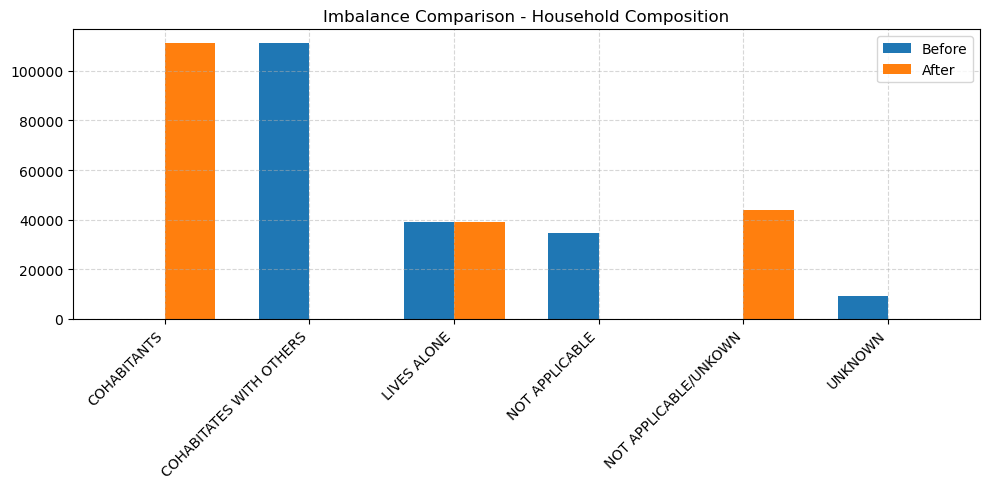

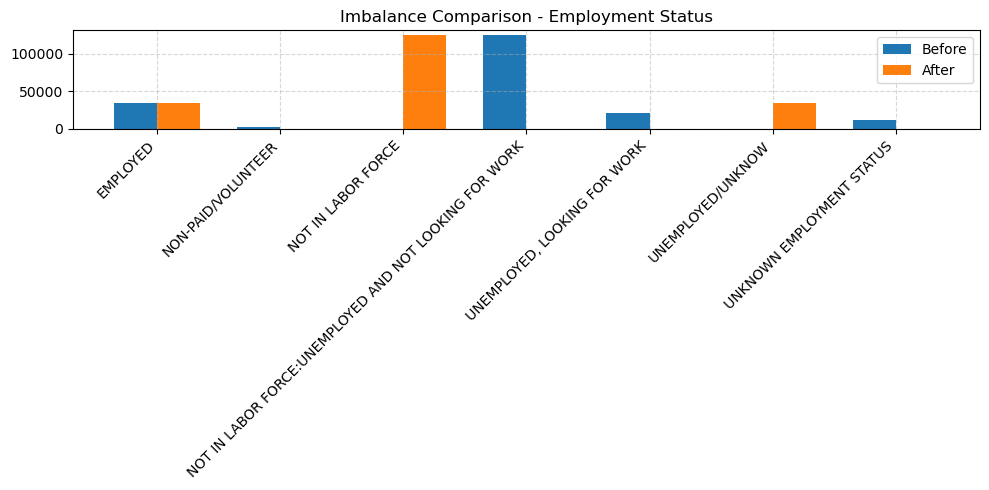

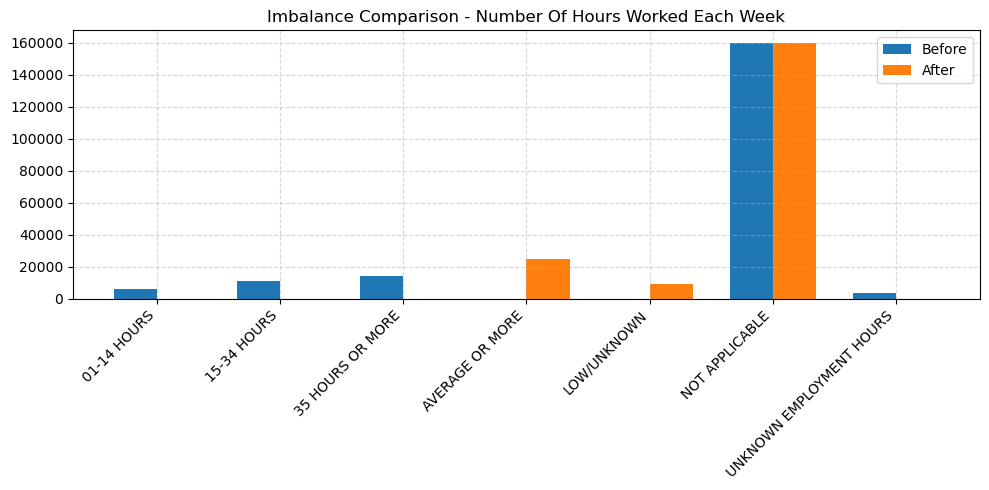

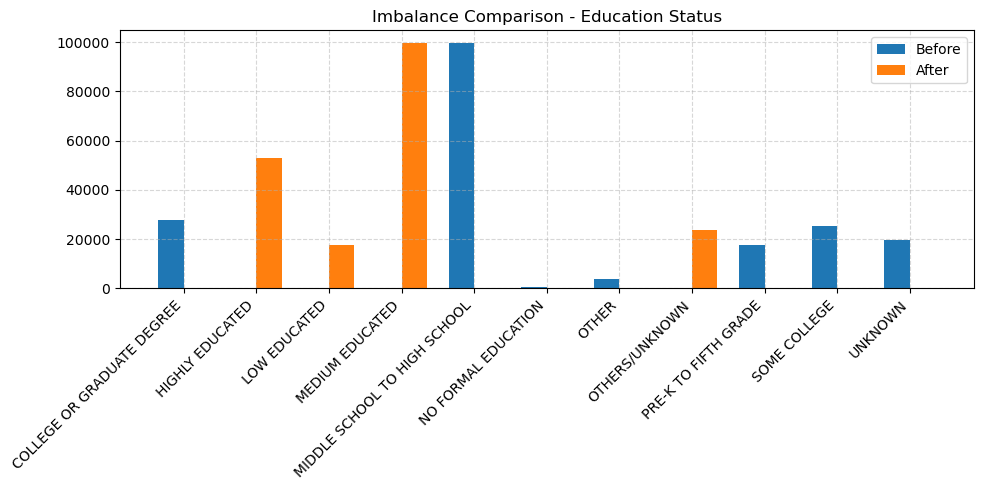

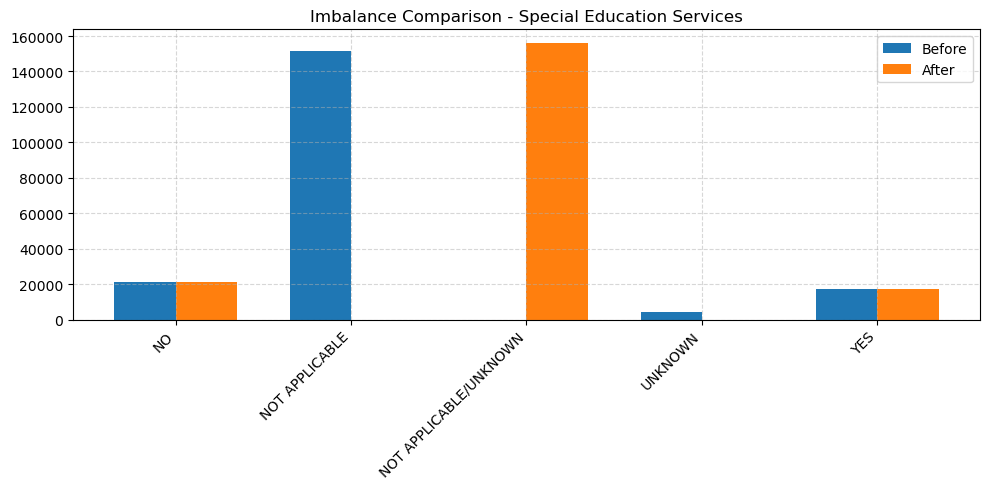

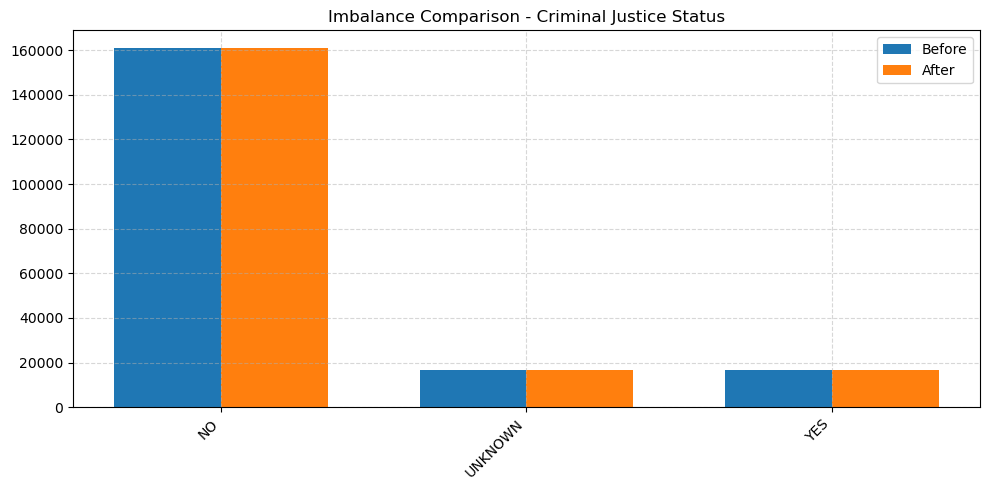

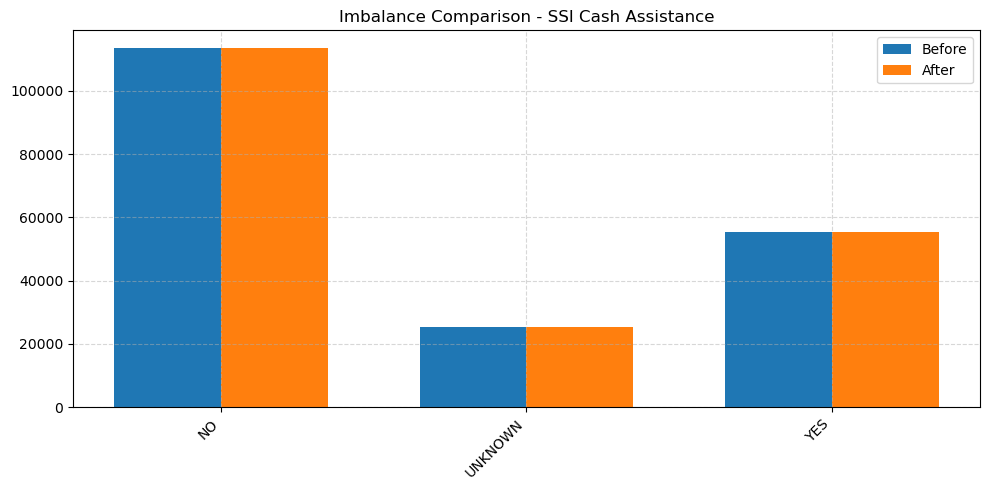

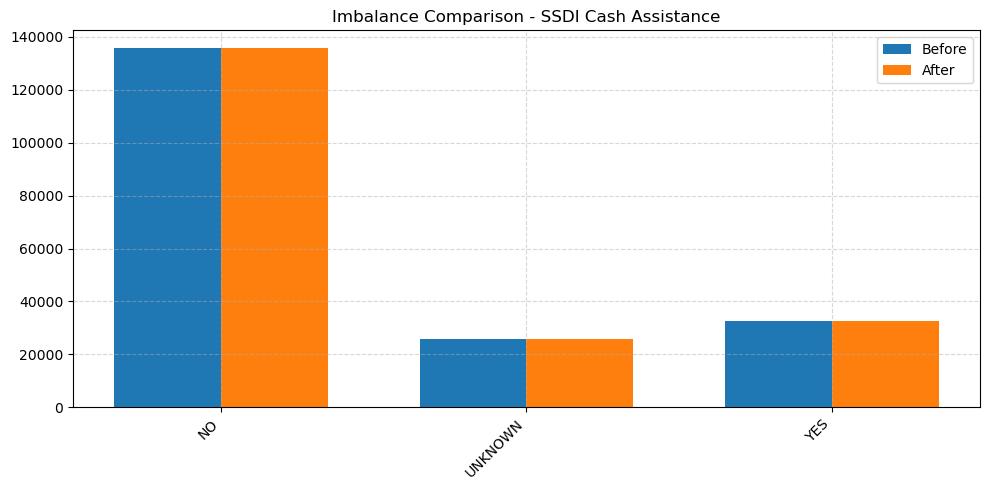

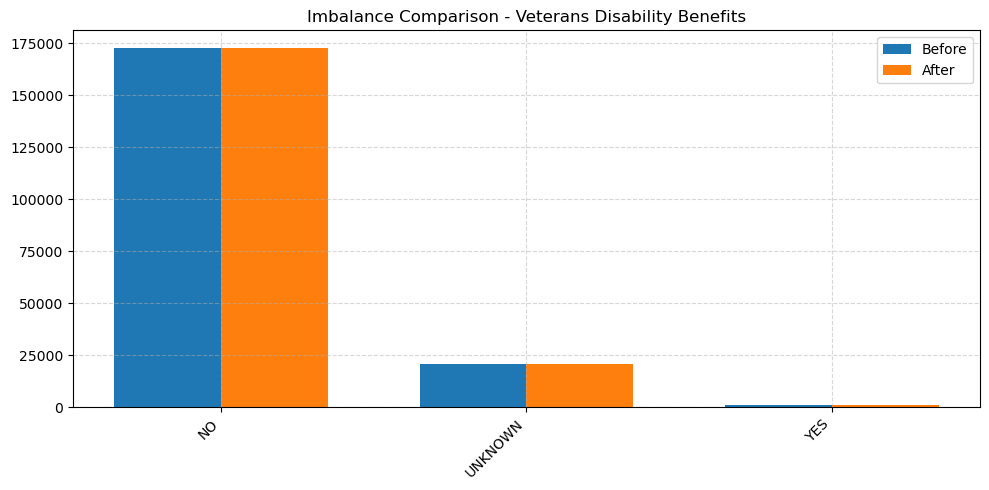

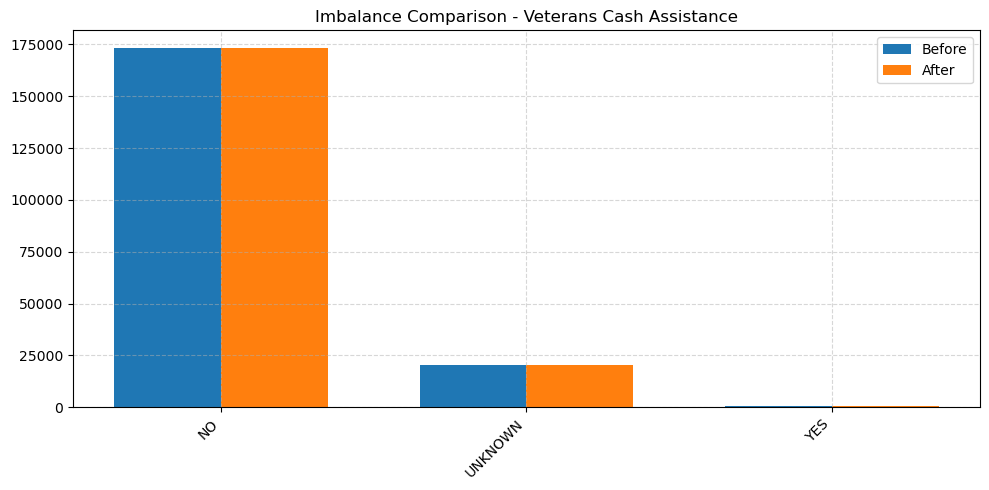

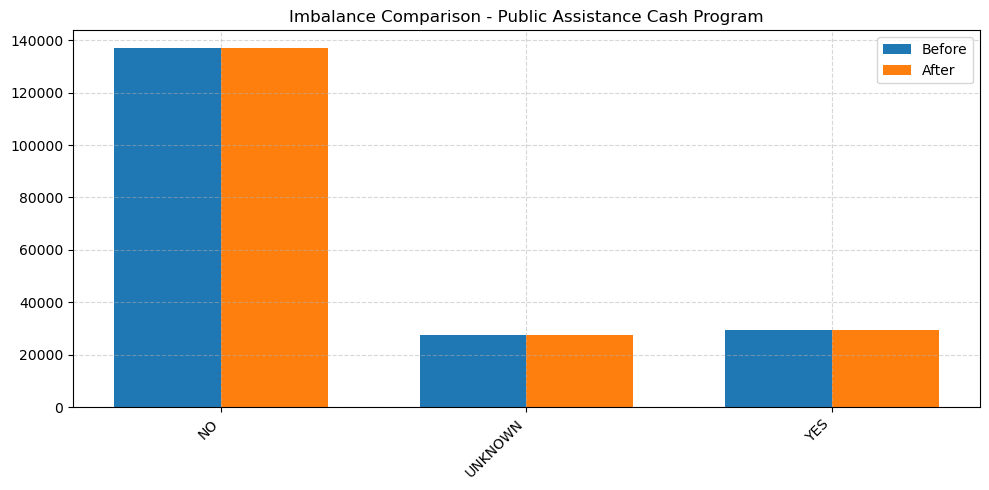

In [10]:
# Using Matplotlib

# Example list of columns you want to compare
'''columns_to_compare = [
    'Living Situation', 'Household Composition', 'Employment Status', 'Number Of Hours Worked Each Week', 'Education Status', 'Special Education Services',
    'Criminal Justice Status', 'SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits',
    'Veterans Cash Assistance', 'Public Assistance Cash Program', 'Other Cash Benefits'
]'''

columns_to_compare = new_soc_grp.columns[1:-2]

# Assuming: df_original = original DataFrame before aggregation
#           df_aggregated = DataFrame after aggregation

for col in columns_to_compare:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Original counts
    original_counts = new_soc_grp[col].value_counts().sort_index()
    
    # Aggregated counts
    aggregated_counts = Social_cat_agg[col].value_counts().sort_index()
    
    # Align index (union of both sets of categories)
    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    x = range(len(all_categories))
    width = 0.35

    ax.bar(x, original_counts, width=width, label='Before', align='center')
    ax.bar([i + width for i in x], aggregated_counts, width=width, label='After', align='center')

    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(all_categories, rotation=45, ha='right')
    ax.set_title(f'Imbalance Comparison - {col}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

In [11]:
#Using Plotly

for col in columns_to_compare:
    original_counts = new_soc_grp[col].value_counts().sort_index()
    aggregated_counts = Social_cat_agg[col].value_counts().sort_index()

    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    fig = go.Figure(data=[
        go.Bar(name='Before', x=all_categories, y=original_counts, marker_color='indianred'),
        go.Bar(name='After', x=all_categories, y=aggregated_counts, marker_color='steelblue')
    ])

    fig.update_layout(
        title=f'Imbalance Comparison - {col}',
        barmode='group',
        xaxis_tickangle=-45,
        xaxis_title=col,
        yaxis_title='Count',
        template='plotly_white',
        height=500
    )

    fig.show()

In [12]:

# Apply grouping functions to create new columns
Social_cat_agg_feat_merg = Social_cat_agg.copy()


# Drop original columns that are no longer needed
Social_cat_agg_feat_merg.drop(columns=['Living Situation'], inplace=True)

# Display the first few rows of the updated DataFrame
Social_cat_agg_feat_merg.head()


def education_group(row):
    education_status = row['Education Status']
    
    if education_status in ['HIGHLY EDUCATED', 'MEDIUM EDUCATED']:
        return 'Educated'
    elif education_status =='LOW EDUCATED':
        return 'Low Educated'
    else:
        return 'Others/Unknown'

def criminal_justice_group(row):
    criminal_status = row['Criminal Justice Status']
    
    if criminal_status == 'YES':
        return 'Involved'
    else:
        return 'Not Involved/Unknown'
    
# Function to aggregate multiple cash assistance related columns into one summary column
def cash_assistance_group(row):
    cash_cols = [
        'SSI Cash Assistance',
        'SSDI Cash Assistance',
        'Veterans Disability Benefits',
        'Veterans Cash Assistance',
        'Public Assistance Cash Program',
        'Other Cash Benefits'
    ]
    # If any cash assistance column is 'YES', then overall is 'Receiving Cash Assistance'
    for col in cash_cols:
        if col in row and row[col] == 'YES':
            return 'Receiving Cash Assistance'
    return 'No/Unknown'

# Assuming your aggregated social DataFrame is named Social_cat_agg_feat_merg

# Add the new Cash Assistance Situation column:
Social_cat_agg_feat_merg['Cash Assistance Situation'] = Social_cat_agg_feat_merg.apply(cash_assistance_group, axis=1)

# Optional: Drop the original cash assistance columns if no longer needed
cols_to_drop = [
    'Special Education Services',
    'SSI Cash Assistance',
    'SSDI Cash Assistance',
    'Veterans Disability Benefits',
    'Veterans Cash Assistance',
    'Public Assistance Cash Program',
    'Other Cash Benefits'
]

Social_cat_agg_feat_merg.drop(columns=cols_to_drop, inplace=True)


Social_cat_agg_feat_merg['Education Group'] = Social_cat_agg_feat_merg.apply(education_group, axis=1)
Social_cat_agg_feat_merg['Criminal Justice Group'] = Social_cat_agg_feat_merg.apply(criminal_justice_group, axis=1)

# Drop original columns that are no longer needed
Social_cat_agg_feat_merg.drop(columns=['Education Status', 'Criminal Justice Status'], inplace=True)

# Display the first few rows of the updated DataFrame
Social_cat_agg_feat_merg.head()


,Household Composition,Employment Status,Number Of Hours Worked Each Week,Mental Illness,Cash Assistance Situation,Education Group,Criminal Justice Group
0,COHABITANTS,EMPLOYED,LOW/UNKNOWN,YES,No/Unknown,Educated,Not Involved/Unknown
1,LIVES ALONE,EMPLOYED,LOW/UNKNOWN,YES,No/Unknown,Educated,Not Involved/Unknown
2,COHABITANTS,EMPLOYED,AVERAGE OR MORE,YES,No/Unknown,Educated,Not Involved/Unknown
3,NOT APPLICABLE/UNKOWN,EMPLOYED,AVERAGE OR MORE,YES,Receiving Cash Assistance,Educated,Not Involved/Unknown
4,COHABITANTS,EMPLOYED,AVERAGE OR MORE,YES,Receiving Cash Assistance,Educated,Not Involved/Unknown


In [13]:
print(Social_cat_agg_feat_merg.shape)

(194117, 7)


### Feature Selection


### 🧪 Statistical Test Explanation

The **Chi-Square Test of Independence** checks whether two categorical variables are **statistically independent** (no association) or **associated** (dependent).

#### 📌 Hypotheses

- **Null Hypothesis (H₀)**:  
  There is **no association** between the categorical feature and the target variable *Mental Illness*.

- **Alternative Hypothesis (H₁)**:  
  There is a **significant association** between the categorical feature and the target variable *Mental Illness*.

If the **p-value < 0.05**, we **reject H₀**, suggesting a **significant relationship** between the variables.

This code helps identify which categorical features are significantly associated with the target variable "Mental Illness" using the Chi-Square Test of Independence. Only features with p-value < 0.05 are considered statistically relevant for modeling **those with the label "Reject Null Hypothesis"**.

In [14]:
# univariate test
# https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43/
#https://machinelearningmastery.com/chi-squared-test-for-machine-learning/
### test chi square categorical variables 
## This code computes the pairwise chi-squared p-values for categorical features in the Social_cat_agg_feat_merg DataFrame.
## if p-value < 0.05, it indicates a significant association between the feature and the target variable "Mental Illness".
from scipy.stats import chi2_contingency
# Select categorical columns (object or category type)
categorical_cols = Social_cat_agg_feat_merg.select_dtypes(include=['object', 'category']).columns

chi2_check = []
for i in categorical_cols:
    if chi2_contingency(pd.crosstab(Social_cat_agg_feat_merg['Mental Illness'], Social_cat_agg_feat_merg[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_cols, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                             Column              Hypothesis
0             Household Composition  Reject Null Hypothesis
1                 Employment Status  Reject Null Hypothesis
2  Number Of Hours Worked Each Week  Reject Null Hypothesis
3                    Mental Illness  Reject Null Hypothesis
4         Cash Assistance Situation  Reject Null Hypothesis
5                   Education Group  Reject Null Hypothesis
6            Criminal Justice Group  Reject Null Hypothesis


#### 🔍 Chi-Square Test for Association with "Mental Illness"

This code calculates **Chi-Square p-values** between all pairs of categorical features in the `Clinical_cat_agg_feat_merg` DataFrame.

It then focuses on extracting the p-values that show how strongly each feature is associated with the **"Mental Illness"** column.

---

#### 📊 Output: `result_df` Columns

- **Variable**: Name of the feature tested against *Mental Illness*.
- **p_value**: Chi-Square test p-value for association with *Mental Illness*.
- **Correlation**: 
  - `"Associated"` if p ≤ 0.05 (significant)
  - `"Not Associated"` if p > 0.05 (not significant)

The result is sorted by p-value to highlight the most significant associations.


In [15]:
# p values for correlation with the target column "Mental Illness" 
# This code computes the pairwise chi-squared p-values for categorical features in 
# the Social_cat_agg_feat_merg DataFrame.
# It then extracts the p-values for the "Mental Illness" column and
#  builds a results DataFrame with correlation labels.
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Get all column names
columns = Social_cat_agg_feat_merg.columns.values

# Initialize p-value matrix
p_values = []

# Compute pairwise chi-squared p-values
for i in columns:
    row = []
    for j in columns:
        if i != j:
            table = pd.crosstab(Social_cat_agg_feat_merg[i], Social_cat_agg_feat_merg[j])
            p = chi2_contingency(table)[1]
        else:
            p = 0
        row.append(p)
    p_values.append(row)

# Create p-value DataFrame
p_matrix = pd.DataFrame(p_values, index=columns, columns=columns)

# Extract correlation info for "mental_illness"
mental_pvals = p_matrix["Mental Illness"].drop("Mental Illness")  # exclude self

# Build results DataFrame
result_df = pd.DataFrame({
    "Variable": mental_pvals.index,
    "p_value": mental_pvals.values,
})

# Add correlation label
result_df["Correlation"] = np.where(result_df["p_value"] <= 0.05, "Associated", "Not Associated")

# Sort by p-value (optional)
result_df = result_df.sort_values(by="p_value")

# Display the result
print(result_df)

                           Variable        p_value Correlation
3         Cash Assistance Situation   0.000000e+00  Associated
4                   Education Group  2.436008e-249  Associated
0             Household Composition  1.756001e-103  Associated
2  Number Of Hours Worked Each Week   1.346420e-51  Associated
1                 Employment Status   1.518528e-42  Associated
5            Criminal Justice Group   9.872927e-03  Associated


#### 🔬 Chi-Square Test with Bonferroni Correction

This code performs a **Chi-Square Test of Independence** between each categorical feature and the target variable **Mental Illness**, with an added **Bonferroni correction** to control for multiple comparisons.

#### 📌 Hypotheses (per pair of variables)

- **Null Hypothesis (H₀)**:  
  There is **no association** between the one-hot encoded category and the target variable *Mental Illness*.

- **Alternative Hypothesis (H₁)**:  
  There **is a significant association** between the one-hot encoded category and the target variable *Mental Illness*.

#### 🧠 Why Bonferroni Correction?

When conducting **multiple hypothesis tests**, the chance of obtaining a false positive (Type I error) increases.  
The **Bonferroni correction** adjusts the significance threshold to reduce this risk.

> **Adjusted p-value threshold = 0.05 / number of unique categories in the feature**

This ensures that the **overall Type I error rate** stays controlled across multiple tests.

#### ⚙️ What the Code Does

1. For each categorical feature previously found to be significantly associated (from the first Chi-Square test), the code:
   - Converts the feature into **one-hot encoded (dummy) variables**.
   - Applies the **Chi-Square Test** between each dummy variable and the target variable `Mental Illness`.

2. For each test, it compares the p-value to the **Bonferroni-adjusted threshold**:
   - If **p < adjusted threshold**, the test result is **statistically significant**, and the null hypothesis is rejected.
   - Otherwise, it fails to reject the null hypothesis.

3. Finally, it stores the results in a new DataFrame `res_chi_ph`, showing each **feature-category pair** and the corresponding test outcome.

#### ✅ Result

The output `res_chi_ph` helps identify **specific categories** within a feature that are significantly associated with *Mental Illness*, after correcting for multiple comparisons.

In [16]:
# the same test but with Bonferroni correction
# This code computes the pairwise chi-squared p-values for categorical features in the Social_cat_agg_feat_merg DataFrame.
# It then extracts the p-values for the "Mental Illness" column and builds a results DataFrame with correlation labels.
import pandas as pd
from scipy.stats import chi2_contingency
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(Social_cat_agg_feat_merg[i])
    bon_p_value = 0.05/Social_cat_agg_feat_merg[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(Social_cat_agg_feat_merg['Mental Illness'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,Household Composition-COHABITANTS,Reject Null Hypothesis
1,Household Composition-LIVES ALONE,Reject Null Hypothesis
2,Household Composition-NOT APPLICABLE/UNKOWN,Reject Null Hypothesis
3,Employment Status-EMPLOYED,Reject Null Hypothesis
4,Employment Status-NOT IN LABOR FORCE,Fail to Reject Null Hypothesis
5,Employment Status-UNEMPLOYED/UNKNOW,Reject Null Hypothesis
6,Number Of Hours Worked Each Week-AVERAGE OR MORE,Reject Null Hypothesis
7,Number Of Hours Worked Each Week-LOW/UNKNOWN,Fail to Reject Null Hypothesis
8,Number Of Hours Worked Each Week-NOT APPLICABLE,Reject Null Hypothesis
9,Mental Illness-NO,Reject Null Hypothesis


#### 📈 Cramér's V Test for Association with "Mental Illness"

This code computes the **Cramér's V correlation** between each categorical variable and the target column **"Mental Illness"**.

---

#### 🧪 What is Cramér's V?

- A **measure of association** between two categorical variables.
- **Range**: 0 (no association) to 1 (perfect association).
- Unlike p-values, Cramér's V shows **strength** of association, not just significance.

---

#### ⚙️ What the Code Does

1. **For each feature (excluding "Mental Illness")**:
   - Builds a **contingency table** using `pd.crosstab()`.
   - Runs `chi2_contingency()` to get the chi-squared statistic and p-value.
   - Computes **Cramér's V** (with bias correction).
   - Stores the result with:
     - `Cramers_V`: strength of association
     - `P_value`: significance of the chi-squared test
     - `Significant`: whether the association is statistically significant (p < 0.05)

2. Returns a sorted DataFrame showing which features are **most strongly and significantly associated** with `"Mental Illness"`.

---

#### 📊 Output Columns

- **Variable**: The feature tested
- **Cramers_V**: Strength of association with *Mental Illness*
- **P_value**: p-value from chi-squared test
- **Significant**: `True` if p < 0.05, else `False`

In [17]:
## correlation with the target column "Mental Illness" Cramer's V
# Cramér's V is a measure of association between two nominal variables, giving a value between 0 and 1.
# A value of 0 indicates no association, while a value of 1 indicates perfect association.
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v_with_pvalue(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.to_numpy().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Bias correction
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = float(r - ((r - 1)**2) / (n - 1))
    kcorr = float(k - ((k - 1)**2) / (n - 1))
    v = np.sqrt(phi2corr / min(kcorr - 1, rcorr - 1))
    return v, p

def cramers_v_significance_with_target(df, target_col):
    results = []
    for col in df.columns:
        if col == target_col:
            continue
        confusion = pd.crosstab(df[target_col], df[col])
        v, p = cramers_v_with_pvalue(confusion)
        results.append({
            'Variable': col,
            'Cramers_V': round(v, 4),
            'P_value': round(p, 4),
            'Significant': p < 0.05  # You can set alpha = 0.05
        })
    return pd.DataFrame(results).sort_values(by='Cramers_V', ascending=False)

# Example usage
cramers_v_stats = cramers_v_significance_with_target(Social_cat_agg_feat_merg, target_col='Mental Illness')
print(cramers_v_stats)

                           Variable  Cramers_V  P_value  Significant
3         Cash Assistance Situation     0.0944   0.0000         True
4                   Education Group     0.0767   0.0000         True
0             Household Composition     0.0493   0.0000         True
2  Number Of Hours Worked Each Week     0.0346   0.0000         True
1                 Employment Status     0.0313   0.0000         True
5            Criminal Justice Group     0.0054   0.0099         True


#### ✅ Feature Selection for Categorical Variables using Chi-Squared Test

This code performs **feature selection** on categorical variables using the **Chi-squared test**, which measures the **statistical dependence** between each feature and the target variable.

---

#### ⚙️ How It Works

1. **Chi-squared Test**:
   - For each feature in `X_train`, the Chi-squared test evaluates whether the distribution of the feature is **independent** of the target variable `y_train`.
   - A **low p-value** suggests the feature is **informative**.

2. **SelectKBest**:
   - `SelectKBest(score_func=chi2, k='all')` applies the test to all features.
   - It ranks features by their Chi-squared scores.
   - In this example, all features are kept, but you can change `k` to keep only the top ones.

3. **Transform Data**:
   - The training (`X_train`) and test (`X_test`) sets are transformed using the selected features.
   - The result is reduced feature sets that are likely more **relevant** to the target variable.

---

#### 📦 Output

- `X_train_fs`: Transformed training data with selected features  
- `X_test_fs`: Transformed test data  
- `fs`: The fitted feature selector object (useful to inspect scores or selected features)

---

In [39]:
## bibliography
##https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [18]:
# split into input (X) and output (y) variables

# Set y as the 'mental_illness' column
y = Social_cat_agg_feat_merg["Mental Illness"]

# Set X as all columns except 'mental_illness'
X = Social_cat_agg_feat_merg.drop(columns=["Mental Illness"]).astype(str)

# Store feature names (i.e., all columns except 'mental_illness')
feature_names = X.columns

In [19]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (130058, 6) (130058,)
Test (64059, 6) (64059,)


In [20]:
 #prepare input data
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def prepare_inputs(X_train, X_test):
    # Convert to DataFrames so we can access columns
    X_train_df = pd.DataFrame(X_train)
    X_test_df = pd.DataFrame(X_test)

    X_train_enc = X_train_df.copy()
    X_test_enc = X_test_df.copy()

    for col in X_train_df.columns:
        le = LabelEncoder()
        le.fit(X_train_df[col])

        X_train_enc[col] = le.transform(X_train_df[col])
        X_test_enc[col] = le.transform(X_test_df[col])  # Make sure categories match

    return X_train_enc.values, X_test_enc.values


# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [21]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

# feature selection using Chi-squared test
# This function selects the best features based on the Chi-squared test.
# It returns the transformed training and test sets,
#  as well as the feature selector object.
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [23]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for name, score in zip(feature_names, fs.scores_):
	print(f'{name}: {score:.4f}')

Household Composition: 250.2358
Employment Status: 45.0028
Number Of Hours Worked Each Week: 40.5978
Cash Assistance Situation: 583.9846
Education Group: 144.5484
Criminal Justice Group: 0.3337


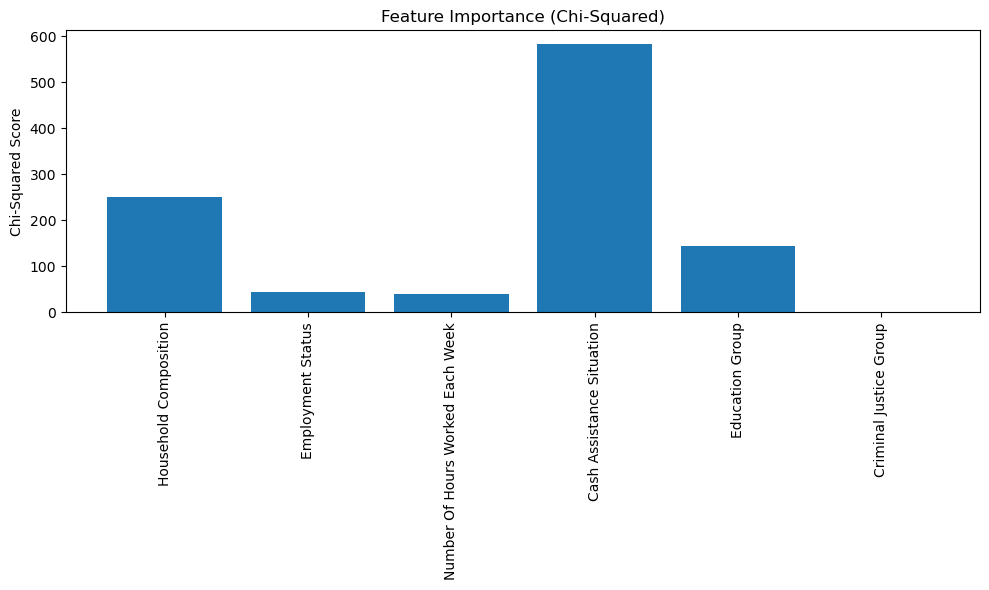

In [24]:
# plot the scores
from matplotlib import pyplot

pyplot.figure(figsize=(10, 6))
pyplot.bar(feature_names, fs.scores_)
pyplot.xticks(rotation=90, ha='center')  # 90-degree rotation
pyplot.ylabel("Chi-Squared Score")
pyplot.title("Feature Importance (Chi-Squared)")
pyplot.tight_layout()
pyplot.show()

#### 📊 Visual Analysis of Feature Importance

We will review the **distribution of the target variable ("Mental Illness")** across selected features to better understand their relationship in a **descriptive way**.

This involves:
- Plotting **stacked bar charts** showing the proportion of each category of a feature (e.g., "Criminal Justice Group") for the target values.
- Comparing both **more important** and **less important** features (based on statistical tests like Chi-Squared).
- Visually exploring how strongly different categories **separate or cluster** by the target label.


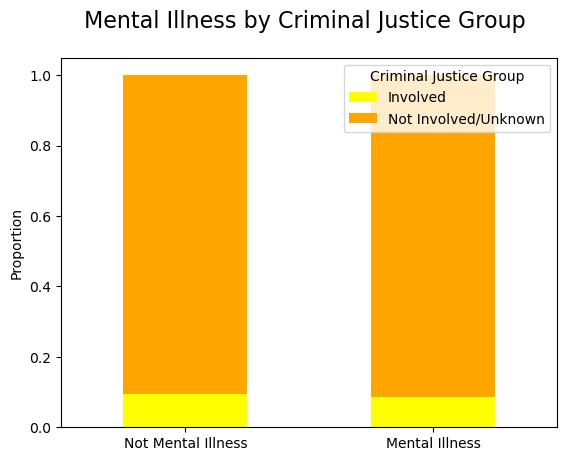

In [49]:
counts_df = Social_cat_agg_feat_merg.groupby(["Criminal Justice Group", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Criminal Justice Group")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Criminal Justice Group", fontsize=16);

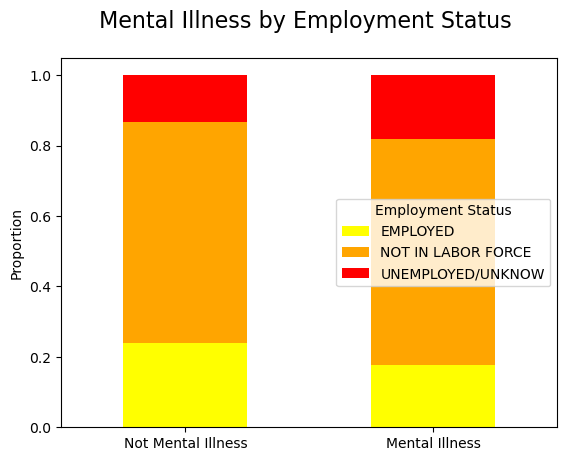

In [50]:
counts_df = Social_cat_agg_feat_merg.groupby(["Employment Status", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Employment Status")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Employment Status", fontsize=16);

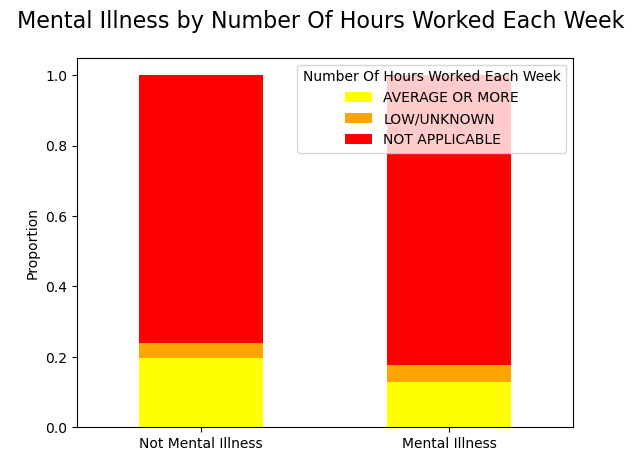

In [51]:
counts_df = Social_cat_agg_feat_merg.groupby(["Number Of Hours Worked Each Week", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Number Of Hours Worked Each Week")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Number Of Hours Worked Each Week", fontsize=16);

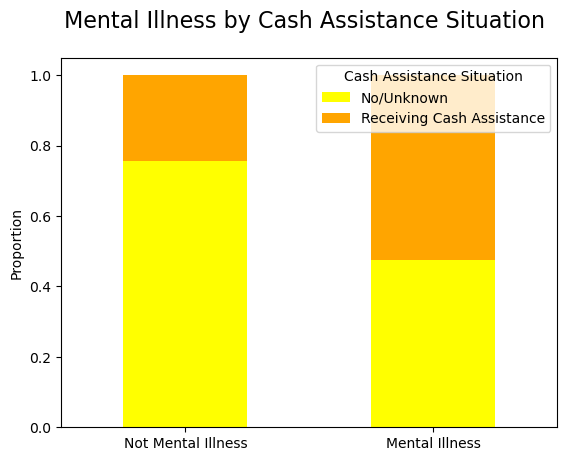

In [52]:
counts_df = Social_cat_agg_feat_merg.groupby(["Cash Assistance Situation", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Cash Assistance Situation")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Cash Assistance Situation", fontsize=16);

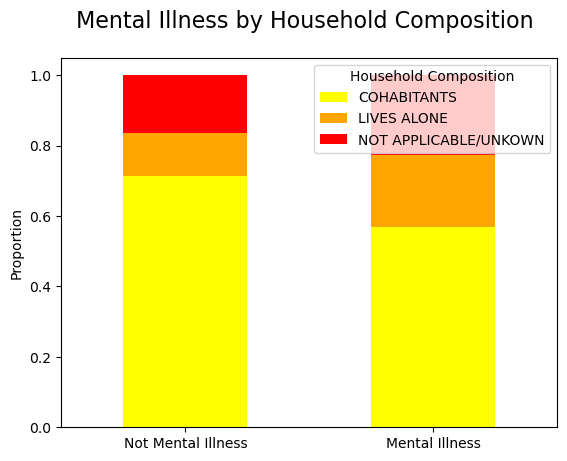

In [53]:
counts_df = Social_cat_agg_feat_merg.groupby(["Household Composition", "Mental Illness"])["Mental Illness"].count().unstack()
counts_df
# Divide by the total number and transpose for plotting
pclass_percents_df = counts_df.div(counts_df.sum()).T
pclass_percents_df
fig, ax = plt.subplots()

pclass_percents_df.plot(kind="bar", stacked=True, color=["yellow", "orange", "red", "green"], ax=ax)

ax.legend(title="Household Composition")
ax.set_xticklabels(["Not Mental Illness", "Mental Illness"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Proportion")

fig.suptitle(" Mental Illness by Household Composition", fontsize=16);

In [25]:
Social_cat_agg_feat_merg.head()


,Household Composition,Employment Status,Number Of Hours Worked Each Week,Mental Illness,Cash Assistance Situation,Education Group,Criminal Justice Group
0,COHABITANTS,EMPLOYED,LOW/UNKNOWN,YES,No/Unknown,Educated,Not Involved/Unknown
1,LIVES ALONE,EMPLOYED,LOW/UNKNOWN,YES,No/Unknown,Educated,Not Involved/Unknown
2,COHABITANTS,EMPLOYED,AVERAGE OR MORE,YES,No/Unknown,Educated,Not Involved/Unknown
3,NOT APPLICABLE/UNKOWN,EMPLOYED,AVERAGE OR MORE,YES,Receiving Cash Assistance,Educated,Not Involved/Unknown
4,COHABITANTS,EMPLOYED,AVERAGE OR MORE,YES,Receiving Cash Assistance,Educated,Not Involved/Unknown


In [26]:
pd.crosstab(Social_cat_agg_feat_merg["Employment Status"], Social_cat_agg_feat_merg["Number Of Hours Worked Each Week"], normalize='index')


Number Of Hours Worked Each Week,AVERAGE OR MORE,LOW/UNKNOWN,NOT APPLICABLE
Employment Status,,,
EMPLOYED,0.72851,0.27149,0.0
NOT IN LABOR FORCE,0.00000,0.00000,1.0
UNEMPLOYED/UNKNOW,0.00000,0.00000,1.0


In [27]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(Social_cat_agg_feat_merg["Employment Status"], Social_cat_agg_feat_merg["Number Of Hours Worked Each Week"]))


Chi2ContingencyResult(statistic=194117.0, pvalue=0.0, dof=4, expected_freq=array([[  4453.22905773,   1659.55760701,  28334.21333526],
       [ 16122.09314486,   6008.12174101, 102578.78511413],
       [  4519.67779741,   1684.32065198,  28757.00155061]]))

In [28]:
import pandas as pd

# Load your original dataset if needed
# Social_cat_agg_feat_merg = pd.read_csv("your_original_file.csv")

# 🗒️ Reason for dropping:
# 1. "Number Of Hours Worked Each Week" is highly correlated with "Employment Status" (perfectly dependent),
#    so it is redundant and adds no extra information.
# 2. "Criminal Justice Group" shows very low association with the target variable (low chi2 and low Cramér's V),
#    so it is not informative for prediction.

# 🔻 Drop the two columns
columns_to_drop = ["Number Of Hours Worked Each Week", "Criminal Justice Group"]
cleaned_df = Social_cat_agg_feat_merg.drop(columns=columns_to_drop)

# 💾 Save to CSV
output_filename = "social_features_cleaned.csv"
cleaned_df.to_csv(output_filename, index=False)

print(f"✅ Cleaned dataset saved as '{output_filename}' with columns removed: {columns_to_drop}")


✅ Cleaned dataset saved as 'social_features_cleaned.csv' with columns removed: ['Number Of Hours Worked Each Week', 'Criminal Justice Group']


In [30]:
cleaned_df.head()

,Household Composition,Employment Status,Mental Illness,Cash Assistance Situation,Education Group
0,COHABITANTS,EMPLOYED,YES,No/Unknown,Educated
1,LIVES ALONE,EMPLOYED,YES,No/Unknown,Educated
2,COHABITANTS,EMPLOYED,YES,No/Unknown,Educated
3,NOT APPLICABLE/UNKOWN,EMPLOYED,YES,Receiving Cash Assistance,Educated
4,COHABITANTS,EMPLOYED,YES,Receiving Cash Assistance,Educated
